In [1]:
!pip install -U torchtext==0.17.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 820.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16

In [2]:
# import torchtext
import torch
import torch.nn as nn
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset (1).zip


In [4]:
!unzip /content/dataset.zip


Archive:  /content/dataset.zip
replace imbalanced_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace raw_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/content/imbalanced_data.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
df.drop("id",axis = 1,inplace=True)
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


<Axes: xlabel='label', ylabel='count'>

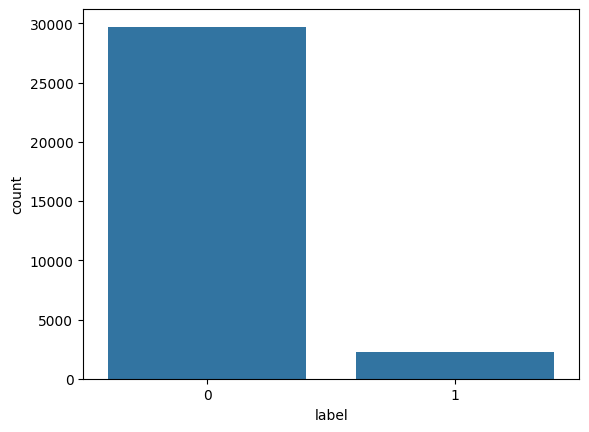

In [8]:
import seaborn as sns
sns.countplot(x = "label",data = df)

In [9]:
raw_data = pd.read_csv('/content/raw_data.csv')
raw_data.sample(3,random_state=42)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
2281,2326,3,0,3,0,1,934 8616\ni got a missed call from yo bitch
15914,16283,3,0,3,0,1,RT @KINGTUNCHI_: Fucking with a bad bitch you ...
18943,19362,3,0,1,2,2,RT @eanahS__: @1inkkofrosess lol my credit ain...


In [10]:
raw_data.drop(["Unnamed: 0","count","hate_speech","offensive_language","neither"],axis=1,inplace=True)
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [11]:
raw_data['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


In [12]:
raw_data['class'].replace({0:1},inplace = True)
raw_data['class'].value_counts()

<ipython-input-12-1378eca7cca3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['class'].replace({0:1},inplace = True)


,count
class,
1,20620
2,4163


In [13]:
raw_data.rename(columns = {'class':'label'},inplace= True)
raw_data.head()

,label,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [14]:
raw_data['label'].replace({2:0},inplace = True)
raw_data['label'].value_counts()

<ipython-input-14-b1d5555ec996>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['label'].replace({2:0},inplace = True)


,count
label,
1,20620
0,4163


In [15]:
new_data = pd.concat([df,raw_data],axis = 0)
new_data.shape

(56745, 2)

In [16]:
new_data.iloc[0]['tweet']

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [17]:
total_entry = new_data[new_data['label'] == 0].shape[0] + new_data[new_data['label'] == 1].shape[0]
print(f"0's: {((new_data[new_data['label'] == 0].shape[0])/total_entry)*100} %")
print(f"1's: {((new_data[new_data['label'] == 1].shape[0])/total_entry)*100} %")

0's: 59.71098775222487 %
1's: 40.28901224777513 %


In [18]:
from nltk.stem import PorterStemmer

In [19]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [20]:
import string
import re
from nltk.tokenize import word_tokenize

In [21]:
def text_preprocess(words):
    words = str(words).lower()
    words = re.sub('\[.*?\]','',words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)

    # The line below was causing the issue. Changed to check 'word' in stop_words
    words = [word for word in words.split(' ') if word not in stop_words]
    words=" ".join(words)
    words = [ps.stem(word) for word in words.split(' ')]
    words=" ".join(words)

    return words

In [22]:
new_data['tweet'] = new_data['tweet'].apply(text_preprocess)

In [23]:
X = new_data['tweet']
y = new_data['label']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,train_size = 0.75,shuffle = True)
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

42558 42558
14187 14187


In [25]:
# from torchtext.vocab import vocab
from collections import Counter
from torch.nn.utils.rnn import pad_sequence

In [26]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
# from torchtext.data.utils import get_tokenizer
# tokenizer = get_tokenizer("basic_english")

# class Tokenizer():
#   def __init__(self, num_words):
#     self.num_words = num_words
#     self.stoi = {"<PAD>": 0, "<UNK>": 1}
#     self.itos = {0: "<PAD>", 1: "<UNK>"}
#     self.tokenizer = get_tokenizer("basic_english")

#   def fit_on_texts(self, texts):
#     counter = Counter(word for text in texts for word in self.tokenizer(text))
#     sorted_vocab = sorted(counter.items(), key=lambda x: x[1], reverse=True)[: self.num_words - 2]

#     for idx, (word, _) in enumerate(sorted_vocab, start=2):
#       self.stoi[word] = idx
#       self.itos[idx] = word

#   def text_to_sequences(self, texts):
#     return [[self.stoi.get(word, self.stoi["<UNK>"]) for word in self.tokenizer(text)] for text in texts]

#   def pad_sequences(self, sequences, maxlen):
#     padded_tensors = [
#         torch.tensor(
#             seq[:maxlen] if len(seq) > maxlen
#             else  [self.stoi["<PAD>"]] * (maxlen - len(seq)) +seq
#         )
#         for seq in sequences
#     ]
#     return pad_sequence(padded_tensors, batch_first=True, padding_value=self.stoi["<PAD>"])


In [28]:

class Tokenizer():
    def __init__(self, num_words):
        self.num_words = num_words
        self.stoi = {"<PAD>": 0, "<UNK>": 1}  # Special tokens
        self.itos = {0: "<PAD>", 1: "<UNK>"}  # Reverse mapping

    def fit_on_texts(self, texts):
        """Build vocabulary from training data only."""
        tokenized_texts = [word_tokenize(text) for text in texts]  # Tokenize each sentence
        counter = Counter(word for txt in tokenized_texts for word in txt)  # Count word occurrences

        # Keep most frequent words (excluding special tokens)
        sorted_vocab = sorted(counter.items(), key=lambda x: x[1], reverse=True)[: self.num_words - 2]

        # Assign indices starting from 2 (0 and 1 are reserved)
        for idx, (word, _) in enumerate(sorted_vocab, start=2):
            self.stoi[word] = idx
            self.itos[idx] = word

    def text_to_sequences(self, texts):
        """Convert text to sequences using the same vocabulary."""
        tokenized_texts = [word_tokenize(text) for text in texts]  # Tokenize each sentence
        sequences = [[self.stoi.get(word, self.stoi["<UNK>"]) for word in txt] for txt in tokenized_texts]
        return sequences

    def pad_sequences(self, sequences, maxlen):
        """Manually pad sequences to fixed maxlen."""
        padded_seqs = [
            [self.stoi["<PAD>"]] * (maxlen - len(seq)) +seq  if len(seq) < maxlen else seq[:maxlen]
            for seq in sequences
        ]
        return torch.tensor(padded_seqs, dtype=torch.int64)



In [29]:
max_words = 50000
max_len = 300
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.text_to_sequences(X_train)
X_train_tensor = tokenizer.pad_sequences(X_train_sequences,max_len)

In [30]:
X_train_tensor.shape

torch.Size([42558, 300])

Using torch nlp

In [31]:
X_test_sequences = tokenizer.text_to_sequences(X_test)
X_test_tensor = tokenizer.pad_sequences(X_test_sequences,max_len)

In [32]:
X_test_tensor.shape

torch.Size([14187, 300])

In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [34]:
# X_train_tensor = convert_to_tensor(X_train)
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)

# X_test_tensor = convert_to_tensor(X_test)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

In [35]:
from torch.utils.data import TensorDataset,DataLoader

In [36]:
#create dataset
X_train_dataset = TensorDataset(X_train_tensor,y_train_tensor)
val_dataset = TensorDataset(X_test_tensor,y_test_tensor)
# val_dataset = val_dataset.to(device)

In [37]:
#create dataloader
batch_size = 32
train_loader = DataLoader(X_train_dataset,batch_size = batch_size,shuffle = True,num_workers = 0)
val_loader = DataLoader(val_dataset,batch_size = 2*batch_size,num_workers=0)

In [38]:
import torch.nn.functional as F

In [39]:
!pip install pytorch-lightning

In [40]:
import pytorch_lightning as pl

In [41]:
from pytorch_lightning.callbacks import EarlyStopping

In [42]:
!pip install torchmetrics

In [43]:
from torchmetrics import Recall

In [44]:
recall_metric = Recall(task="binary").to(device)

In [45]:
class LSTMModel(pl.LightningModule):
    def __init__(self,max_words,embedding_dim,max_len,optim_name,lr):
        super().__init__()
        self.max_words = max_words
        self.embedding_dim = embedding_dim
        self.max_len = max_len
        self.optimizer_name = optim_name
        self.embedding = nn.Embedding(self.max_words,self.embedding_dim)
        self.lstm = nn.LSTM(input_size=self.embedding_dim,hidden_size = embedding_dim,batch_first = True,dropout=0.2)
        self.fc = nn.Linear(embedding_dim,1)
        self.dropout = nn.Dropout(0.3)
        self.lr = lr
        self.criterion = nn.BCEWithLogitsLoss()
        self.save_hyperparameters()

    def forward(self,x):
        x = self.embedding(x)
        x,_ = self.lstm(x)
        x = x[:,-1,:]
        # x = self.dropout(x)
        x = self.fc(x)
        return x

    def save_hyperparameters(self):
        self.hparams["max_words"] = self.max_words
        self.hparams["embedding_dim"] = self.embedding_dim
        self.hparams["max_len"] = self.max_len
        self.hparams["optim_name"] = self.optimizer_name
        self.hparams["lr"] = self.lr


    def configure_optimizers(self):
        if self.optimizer_name == "Adam":
            optimizer = torch.optim.Adam(self.parameters(), lr=self.lr,weight_decay=1e-5)
        elif self.optimizer_name == 'SGD':
            optimizer = torch.optim.SGD(self.parameters(), lr=self.lr)
        elif self.optimizer_name == 'AdamW':
            optimizer = torch.optim.AdamW(self.parameters(), lr=self.lr, weight_decay=1e-5)
        else:
            optimizer = torch.optim.RMSprop(self.parameters(), lr=self.lr)
        return optimizer

    def training_step(self,train_batch,batch_idx):
        x,y = train_batch
        y = torch.unsqueeze(y,dim = -1)
        y_pred = self(x)
        loss = self.criterion(y_pred,y)
        self.log("train_loss",loss,prog_bar=True, on_step=False, on_epoch=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        x, y = val_batch
        y_pred = self(x)
        y = torch.unsqueeze(y, dim=-1)

        # Compute loss
        loss = self.criterion(y_pred, y)

        # Compute accuracy
        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()  # Convert logits to class labels
        accuracy = (y_pred_class == y).float().mean()

        recall_score = recall_metric(y_pred_class, y)

        # Log loss and accuracy
        self.log("val_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log("val_acc", accuracy, prog_bar=True, on_step=False, on_epoch=True)
        self.log("val_recall_score", recall_score, prog_bar=True, on_step=False, on_epoch=True)

        return loss

    def predict_step(self,batch,batch_idx):
        y_pred = self(batch)
        if torch.sigmoid(y_pred)>0.5:
            return 1
        else:
            return 0



In [46]:
early_stop_callback = EarlyStopping(monitor="val_acc", patience=5, mode="max")
model = LSTMModel(50000,100,300,"Adam",1e-3)
trainer = pl.Trainer(accelerator = "gpu",max_epochs = 20,callbacks = [early_stop_callback])
trainer.fit(model,train_loader,val_loader)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | embedding | Embedding         | 5.0 M  | train
1 | lstm      | LSTM              | 80.8 K | train
2 | fc        | Linear            | 101    | train
3 | dropout   | Dropout           | 0      | train
4 | crite

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [50]:
import torch
print(torch.version.cuda)
print(torch.__version__)

12.1
2.2.0+cu121


In [51]:
trainer.save_checkpoint("model.ckpt")

In [47]:
best_epoch = early_stop_callback.stopped_epoch - early_stop_callback.patience
best_val_acc = early_stop_callback.best_score.item()  # Convert to Python float

print(f"Best Validation Accuracy: {best_val_acc:.4f} at Epoch {best_epoch}")


Best Validation Accuracy: 0.9431 at Epoch 3


In [52]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [53]:
# Load the model
loaded_model = LSTMModel.load_from_checkpoint("model.ckpt")
loaded_model.eval()  # Set the model to evaluation mode

# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

# Now you can use loaded_model and load_tokenizer for predictions


In [54]:
test = 'i love this movie'

In [55]:
test = [text_preprocess(test)]
print(test)

['love movi']


In [56]:
seq = load_tokenizer.text_to_sequences(test)
len(seq)

1

In [57]:
seq = load_tokenizer.text_to_sequences(test)
padded = load_tokenizer.pad_sequences(seq,maxlen = 300)
print(padded.shape)

torch.Size([1, 300])


In [58]:
loaded_model.eval()
with torch.no_grad():
    y_hat = loaded_model(padded)


In [59]:
# Create an instance of the Sigmoid function
sigmoid = torch.nn.Sigmoid()

# Apply the sigmoid function to y_hat
if sigmoid(y_hat) > 0.5:
    print("Hate")
else:
    print("No hate")

No hate
